In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

expected_returns = pd.read_csv("../data/results/expected_returns.csv", index_col=0).iloc[:, 0]
betas = pd.read_csv("../data/processed/factor_betas.csv", index_col=0)
merged = pd.read_csv("../data/processed/merged_dataset.csv", index_col=0, parse_dates=True)

In [2]:
top_stocks = expected_returns.head(20)
n = len(top_stocks)

weights_lo = np.ones(n) / n
weights_lo = pd.Series(weights_lo, index=top_stocks.index)
weights_lo

NVDA      0.05
AVGO      0.05
AAPL      0.05
META      0.05
MSFT      0.05
ADBE      0.05
GOOGL     0.05
MA        0.05
BA        0.05
TSLA      0.05
HD        0.05
BLK       0.05
AXP       0.05
SBUX      0.05
AMZN      0.05
NKE       0.05
V         0.05
MS        0.05
GE        0.05
Mkt-RF    0.05
dtype: float64

In [3]:
stock_returns = merged[top_stocks.index]
stock_returns.head()

,NVDA,AVGO,AAPL,META,MSFT,ADBE,GOOGL,MA,BA,TSLA,HD,BLK,AXP,SBUX,AMZN,NKE,V,MS,GE,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.060417,-0.088951,-0.099608,-0.029039,-0.036788,-0.039498,-0.027696,-0.045114,-0.039869,-0.031472,-0.022040,-0.029377,-0.019520,-0.043377,-0.025241,-0.017688,-0.036037,-0.017822,0.001242,-0.0245
2019-01-04,0.064068,0.009828,0.042690,0.047138,0.046509,0.048632,0.051293,0.047356,0.052042,0.057697,0.029713,0.036616,0.045061,0.033155,0.050064,0.026117,0.043081,0.040827,0.021092,0.0355
2019-01-07,0.052941,0.020366,-0.002226,0.000725,0.001275,0.013573,-0.001994,0.007694,0.003149,0.054361,0.019698,0.002782,0.005428,0.000000,0.034353,0.014334,0.018032,0.009927,0.061968,0.0094
2019-01-08,-0.024895,-0.008026,0.019063,0.032452,0.007251,0.014918,0.008783,0.007281,0.037853,0.001164,0.004802,0.012726,0.004889,0.000787,0.016612,0.013338,0.005439,-0.006233,-0.020595,0.0101
2019-01-09,0.019667,0.043250,0.016982,0.011927,0.014300,0.011819,-0.003427,0.018151,0.009691,0.009483,0.010343,0.005730,0.001825,0.004087,0.001714,-0.001825,0.011769,0.006996,-0.007009,0.0052


In [4]:
portfolio_returns = stock_returns.mul(weights_lo, axis=1).sum(axis=1)
portfolio_returns.head()

Date
2019-01-03   -0.036641
2019-01-04    0.041424
2019-01-07    0.016289
2019-01-08    0.006885
2019-01-09    0.009534
dtype: float64

In [5]:
cumulative_lo = (1 + portfolio_returns).cumprod()

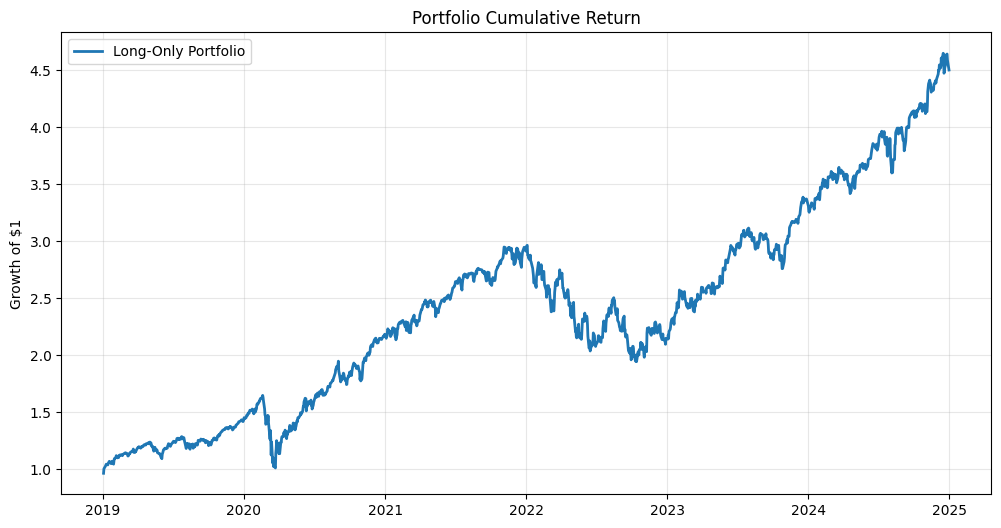

In [6]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_lo, label="Long-Only Portfolio", linewidth=2)
plt.title("Portfolio Cumulative Return")
plt.ylabel("Growth of $1")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [7]:
sharpe_lo = (portfolio_returns.mean() / portfolio_returns.std()) * np.sqrt(252)
sharpe_lo

np.float64(1.1103541314139345)

In [8]:
rolling_max = cumulative_lo.cummax()
drawdowns = (cumulative_lo - rolling_max) / rolling_max
max_drawdown_lo = drawdowns.min()
max_drawdown_lo

np.float64(-0.3866642901147786)

In [9]:
summary = pd.DataFrame({
    "Annualized Return": [(1 + portfolio_returns.mean())**252 - 1],
    "Sharpe Ratio": [sharpe_lo],
    "Max Drawdown": [max_drawdown_lo]
})

summary

,Annualized Return,Sharpe Ratio,Max Drawdown
0,0.32853,1.110354,-0.386664


In [10]:
# Annual Return: 32.85%, sharpe ratio: 1.11035, Max Drawdown: -38.66% 

In [11]:
merged.columns

Index(['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC',
       'BLK', 'C', 'CAT', 'COP', 'COST', 'CRM', 'CVX', 'DE', 'DIS', 'EOG',
       'GE', 'GOOGL', 'GS', 'HD', 'HON', 'JNJ', 'JPM', 'KO', 'LLY', 'MA',
       'MCD', 'META', 'MRK', 'MS', 'MSFT', 'NKE', 'NVDA', 'PEP', 'PFE', 'PG',
       'SBUX', 'SLB', 'TMO', 'TSLA', 'UNH', 'V', 'WFC', 'XOM', 'Mkt-RF', 'SMB',
       'HML', 'RMW', 'CMA', 'RF', 'Market'],
      dtype='object')

In [12]:
import yfinance as yf
import pandas as pd

merged.index = pd.to_datetime(merged.index)

sp500 = yf.download(
    "^GSPC",
    start=merged.index.min(),
    end=merged.index.max(),
    auto_adjust=False,   
    progress=False
)

price_col = "Close"     
sp500["Return"] = sp500[price_col].pct_change()

sp500.head()

Price,Adj Close,Close,High,Low,Open,Volume,Return
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,,
2019-01-03,2447.889893,2447.889893,2493.139893,2443.959961,2491.919922,3858830000,NaN
2019-01-04,2531.939941,2531.939941,2538.070068,2474.330078,2474.330078,4234140000,0.034336
2019-01-07,2549.689941,2549.689941,2566.159912,2524.560059,2535.610107,4133120000,0.007010
2019-01-08,2574.409912,2574.409912,2579.820068,2547.560059,2568.110107,4120060000,0.009695
2019-01-09,2584.959961,2584.959961,2595.320068,2568.889893,2580.000000,4088740000,0.004098


In [13]:
sp500_returns = sp500['Return'].reindex(portfolio_returns.index).dropna()

In [14]:
cumulative_sp500 = (1 + sp500_returns).cumprod()
cumulative_portfolio = (1 + portfolio_returns).cumprod()

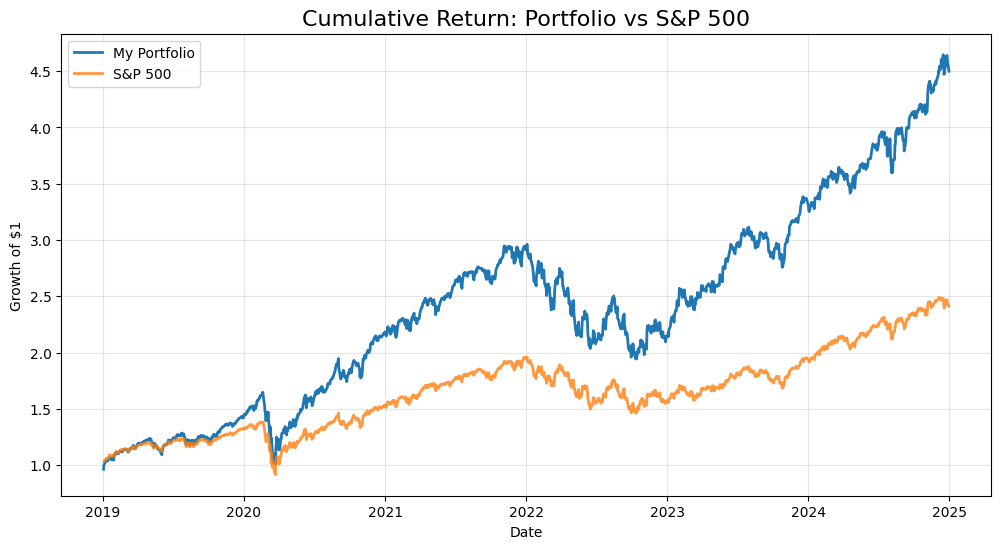

In [15]:
plt.figure(figsize=(12,6))

plt.plot(cumulative_portfolio, label="My Portfolio", linewidth=2)
plt.plot(cumulative_sp500, label="S&P 500", linewidth=2, alpha=0.8)

plt.title("Cumulative Return: Portfolio vs S&P 500", fontsize=16)
plt.ylabel("Growth of $1")
plt.xlabel("Date")

plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [16]:
cumulative_portfolio = (1 + portfolio_returns).cumprod()
cumulative_sp500 = (1 + sp500["Return"]).cumprod()

final_portfolio = cumulative_portfolio.iloc[-1]
final_sp500 = cumulative_sp500.iloc[-1]

outperformance_percent = (final_portfolio - final_sp500) / final_sp500 * 100

outperformance_percent

np.float64(86.47632181601305)